# Using polynomial regression to predict race postions

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



circuits = pd.read_csv("circuits.csv")
constructor = pd.read_csv("constructors.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
sprint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")

In [12]:
pit_counts = pit_stops.groupby(['raceId', 'driverId']).size().rename('num_pit_stops')

lap_times['milliseconds'] = lap_times['milliseconds'].fillna(0)
lap_sums = lap_times.groupby(['raceId', 'driverId'])['milliseconds'].sum().rename('total_race_time')

results['dnf'] = results['statusId'].apply(lambda x: 1 if x != 1 else 0)

features = results[['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'dnf']]

features = features.join(pit_counts, on=['raceId', 'driverId'])
features = features.join(lap_sums, on=['raceId', 'driverId'])

features = features.dropna()

features = features[features['positionOrder'] > 0]

x = features[['grid']]
y = features['positionOrder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# number of data points
n = 30

# variance of noise added to data
noise_std = 0.4

x_data = np.linspace(-5, 5, n)

# define a function relating input to output
f = lambda x: 0.1 * x**2

# generate noisy data from the function

y_data = f(x_data) + np.random.normal(0, noise_std, n)

In [13]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

In [14]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


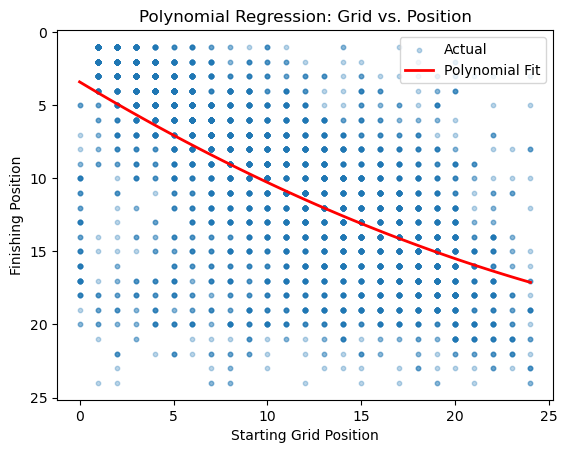

In [25]:
X_plot = np.linspace(x.min(), x.max(), 100)
X_plot_poly = poly.transform(X_plot)

y_plot = model.predict(X_plot_poly)

plt.scatter(x, y, s=10, alpha=0.3, label="Actual")
plt.plot(X_plot, y_plot, color='red', linewidth=2, label="Polynomial Fit")
plt.title("Polynomial Regression: Grid vs. Position")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.legend()
plt.gca().invert_yaxis()  # Lower finish = better
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


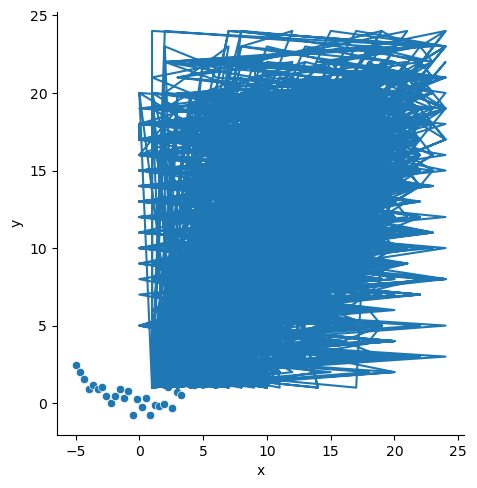

In [17]:
data = {"x": x_data, "y": y_data}
df = pd.DataFrame(data)
sns.relplot(x = "x", y = "y", data = df)
plt.plot(x,y)

In [20]:
features_deg10 = PolynomialFeatures(degree=10)
x_deg2 = features_deg10.fit_transform(df[["x"]])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


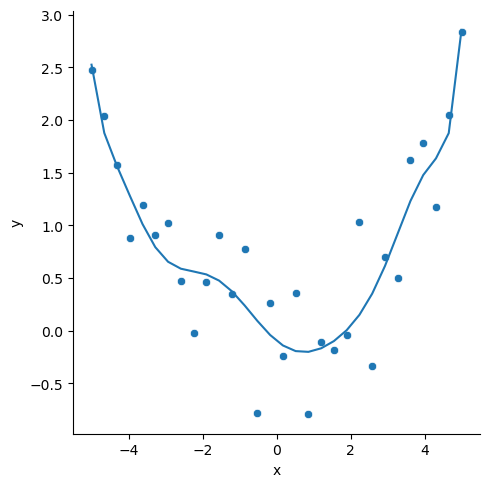

In [21]:
model_deg2 = LinearRegression()
model_deg2.fit(x_deg2, df["y"])
y_pred = model_deg2.predict(x_deg2)
sns.relplot(x = "x", y = "y", data = df)
plt.plot(df["x"],y_pred)

# Adding more features 

In [26]:
poly = PolynomialFeatures(degree=3)
X = features[['grid', 'num_pit_stops', 'total_race_time']]
